In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

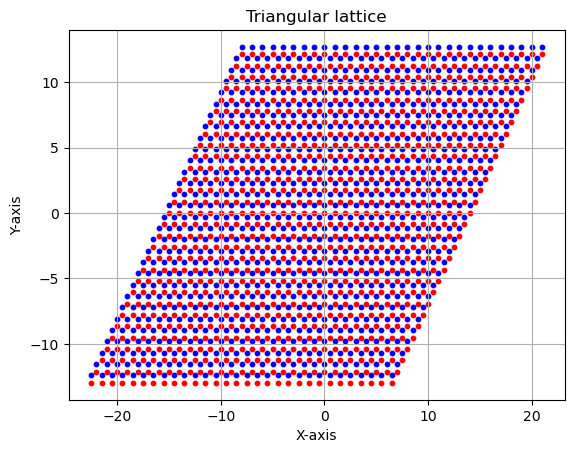

In [2]:
# Defining the Base lattice  - (TRIANGULAR LATICE)
# lattice translation vectors
A1 = [1, 0]
A2 = [1/2, np.sqrt(3)/2]
# number of points along each direction vectors
n = 15
# Lattice generation and visualization
subL1_x = []
subL1_y = []
subL2_x = []
subL2_y = []
for i in range(-n, n):
    for j in range(-n, n):
        subL1_x.append((A1[0] * i) + (A2[0] * j))
        subL1_y.append((A1[1] * i) + (A2[1] * j))
        subL2_x.append((A1[0] * i) + (A2[0] * j))
        subL2_y.append((A1[1] * i) + (A2[1] * j) + (1/np.sqrt(3)))
#print(triX_x)
#print(triX_y)
# Plot the points
g = plt.figure();
plt.scatter(subL1_x, subL1_y, color='red', s=10)
plt.scatter(subL2_x, subL2_y, color='blue', s=10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Triangular lattice')
plt.grid(True)
plt.show()

In [4]:
# Size of skyrmion
size = 2
# skyrmion crystal translation vectors
T1 = np.round(np.array([size + size/2, np.sqrt(3) * size/2 , 0]), 6)
T2 = np.round(np.array([0, np.sqrt(3) * size, 0]), 6)
T3 = np.round(np.array([0, 0, 1]), 6)
# area of skyrmion unit cell
area = np.dot(T1, np.cross(T2, T3))
# reciprocal lattice vectors of SkX
B1 = np.round((2 * np.pi * np.cross(T2, T3))/area, 6)
B2 = np.round((2 * np.pi * np.cross(T3, T1))/area, 6)
print(T1)
print(T2)
#print(T3)
#print(area)
#print(B1)
#print(B2)

[3.       1.732051 0.      ]
[0.       3.464102 0.      ]


In [6]:
# Triple - Q texture formation
e_vectors = np.round([[-1, 0], [1/2, -np.sqrt(3)/2], [1/2, np.sqrt(3)/2]], 6) # skyrmion
#e_vectors = np.round([[0, -1], [-np.sqrt(3)/2, 1/2], [np.sqrt(3)/2, 1/2]], 6) # antiskyrmion
Q_vectors = np.round([[B1[0], B1[1]], [B2[0], B2[1]], [B2[0], -B2[1]]], 6)
#print(Q_vectors)
# spin texture definition
def spin_tex(x, y):
    point = np.array([x, y])
    mx = np.sum([np.sin(np.dot(Q_vectors[i], point) + np.pi/3) * e_vectors[i][0] for i in range(3)])
    my = np.sum([np.sin(np.dot(Q_vectors[i], point) + np.pi/3) * e_vectors[i][1] for i in range(3)])
    mz = np.sum([np.cos(np.dot(Q_vectors[i], point) + np.pi/3) for i in range(3)])
    m = [mx, my, mz]
    m = np.round(m / np.linalg.norm(m), 6)
    return m
print(spin_tex(0,1))

[-0.773735 -0.605345  0.186794]


102
96


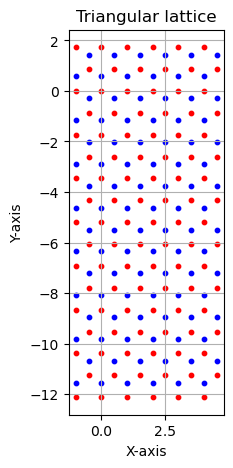

In [17]:
# Isolating a unit cell from SkX
unitcell1_x = []
unitcell1_y = []
unitcell2_x = []
unitcell2_y = []

sk = 8 

# Bounds of unit cell
Xlow = - size/2
Xhigh = (2 * size) + size/2 
Ylow = - np.sqrt(3) * size * (sk - 1) / 2 
Yhigh = np.sqrt(3) * size / 2

for i in range(len(subL1_x)):
    [x1, y1] = [subL1_x[i], subL1_y[i]]
    [x2, y2] = [subL2_x[i], subL2_y[i]]
    if x1 >= Xlow and x1 < Xhigh and y1 >= Ylow and y1 <= Yhigh:
        unitcell1_x.append(x1)  
        unitcell1_y.append(y1)
    if x2 >= Xlow and x2 < Xhigh and y2 >= Ylow and y2 <= Yhigh:
        unitcell2_x.append(x2)  
        unitcell2_y.append(y2)

print(len(unitcell1_x))
print(len(unitcell2_y))

g = plt.figure(figsize=(2,5))
plt.scatter(unitcell1_x, unitcell1_y, color='red', s=10)
plt.scatter(unitcell2_x, unitcell2_y, color='blue', s=10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Triangular lattice')
plt.grid(True)
plt.show()

In [15]:
[0, 1, 26, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 18, 19, 20, 21, 22, 24, 25]
# spin texture in unit cell
spins_cart_L1 = [spin_tex(unitcell1_x[i], unitcell1_y[i]) for i in range(len(unitcell1_x))]
spins_cart_L2 = [spin_tex(unitcell2_x[i], unitcell2_y[i]) for i in range(len(unitcell2_x))]

# getting the theta phi profile of skyrmion
def theta_profile(x, y, z):
    return np.arccos(z/np.linalg.norm([x, y, z]))
def phi_profile(x, y, z):
    [x, y, z] = np.round([x, y, z], 3)
    # Calculate the denominator and check for zero to avoid division by zero
    value = np.arctan2(y, x)
    if x == 0 and y == 0:
        return 0  # or some appropriate value or error handling
    elif value < 0:
        return value + (2* np.pi)
    else:
        return value

theta1 = [theta_profile(spins_cart_L1[i][0], spins_cart_L1[i][1], spins_cart_L1[i][2]) for i in range(len(unitcell1_x))]
phi1 = [phi_profile(spins_cart_L1[i][0], spins_cart_L1[i][1], spins_cart_L1[i][2]) for i in range(len(unitcell1_x))]
theta2 = [theta_profile(spins_cart_L2[i][0], spins_cart_L2[i][1], spins_cart_L2[i][2]) for i in range(len(unitcell2_x))]
phi2 = [phi_profile(spins_cart_L2[i][0], spins_cart_L2[i][1], spins_cart_L2[i][2]) for i in range(len(unitcell2_x))]

#print(theta)
#print(phi)

In [16]:

chi_ket_L1 = [[np.cos(theta1[i]/2), np.sin(theta1[i]/2) * np.exp(1j * phi1[i])] for i in range(len(unitcell1_x))]
chi_bra_L1 = [[np.cos(theta1[i]/2), np.sin(theta1[i]/2) * np.exp(-1j * phi1[i])] for i in range(len(unitcell1_x))]

chi_ket_L2 = [[np.cos(theta2[i]/2), np.sin(theta2[i]/2) * np.exp(1j * phi2[i])] for i in range(len(unitcell2_x))]
chi_bra_L2 = [[np.cos(theta2[i]/2), np.sin(theta2[i]/2) * np.exp(-1j * phi2[i])] for i in range(len(unitcell2_x))]

In [ ]:
Tx = [3 * size, 0]
# neighbour table formation
L1D1 = [-1/2, -1/(2*np.sqrt(3))]
L1D2 = [0, 1/np.sqrt(3)]
L1D3 = [1/2, -1/(2*np.sqrt(3))]
L2D1 = [-1/2, 1/(2*np.sqrt(3))]
L2D2 = [1/2, 1/(2*np.sqrt(3))]
L2D3 = [0, -1/np.sqrt(3)]

L1NN1 = []
L1NN2 = []
L1NN3 = []
L2NN1 = []
L2NN2 = []
L2NN3 = []

def neig_L1_1(i, j):
    [x, y] = np.round([unitcell1_x[i], unitcell1_y[i]], 6)
    [x1, y1] = np.round([unitcell2_x[j], unitcell2_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L1D1[0] , y + L1D1[1]] - , 6)):
        L1NN1.append(None)
    elif np.allclose([x1, y1], np.round([x + L1D1[0] , y + L1D1[1]], 6)):
        L1NN1.append(j)
    elif np.allclose([x1, y1], np.round([x + L1D1[0] + Tx[0], y + L1D1[1] + Tx[1]], 6)):
        L1NN1.append(j)
    return 

def neig_L1_2(i, j):
    [x, y] = np.round([unitcell1_x[i], unitcell1_y[i]], 6)
    [x1, y1] = np.round([unitcell2_x[j], unitcell2_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L1D2[0] , y + L1D2[1]], 6)):
        L1NN2.append(j)
    elif np.allclose([x1, y1], np.round([x + L1D2[0] - T2[0], y + L1D2[1] - T2[1]], 6)):
        L1NN2.append(j)
    return 

def neig_L1_3(i, j):
    [x, y] = np.round([unitcell1_x[i], unitcell1_y[i]], 6)
    [x1, y1] = np.round([unitcell2_x[j], unitcell2_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L1D3[0] , y + L1D3[1]], 6)):
        L1NN3.append(j)
    elif np.allclose([x1, y1], np.round([x + L1D3[0] + T2[0], y + L1D3[1] + T2[1]], 6)):
        L1NN3.append(j)
    elif np.allclose([x1, y1], np.round([x + L1D3[0] - T1[0], y + L1D3[1] - T1[1]], 6)):
        L1NN3.append(j)
    return 

def neig_L2_1(i, j):
    [x, y] = np.round([unitcell2_x[i], unitcell2_y[i]], 6)
    [x1, y1] = np.round([unitcell1_x[j], unitcell1_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L2D1[0] , y + L2D1[1]], 6)):
        L2NN1.append(j)
    elif np.allclose([x1, y1], np.round([x + L2D1[0] + T1[0], y + L2D1[1] + T1[1]], 6)):
        L2NN1.append(j)
    elif np.allclose([x1, y1], np.round([x + L2D1[0] - T2[0], y + L2D1[1] - T2[1]], 6)):
        L2NN1.append(j)
    return 

def neig_L2_2(i, j):
    [x, y] = np.round([unitcell2_x[i], unitcell2_y[i]], 6)
    [x1, y1] = np.round([unitcell1_x[j], unitcell1_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L2D2[0] , y + L2D2[1]], 6)):
        L2NN2.append(j)
    elif np.allclose([x1, y1], np.round([x + L2D2[0] - T1[0], y + L2D2[1] - T1[1]], 6)):
        L2NN2.append(j)
    return 

def neig_L2_3(i, j):
    [x, y] = np.round([unitcell2_x[i], unitcell2_y[i]], 6)
    [x1, y1] = np.round([unitcell1_x[j], unitcell1_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L2D3[0] , y + L2D3[1]], 6)):
        L2NN3.append(j)
    elif np.allclose([x1, y1], np.round([x + L2D3[0] + T2[0], y + L2D3[1] + T2[1]], 6)):
        L2NN3.append(j)
    return 

for i in range(len(unitcell1_x)):
    for j in range(len(unitcell2_x)):
        neig_L1_1(i, j)
        neig_L1_2(i, j)
        neig_L1_3(i, j)
        neig_L2_1(i, j)
        neig_L2_2(i, j)
        neig_L2_3(i, j)
        
print(L1NN1)
print(L1NN2)
print(L1NN3)
print(L2NN1)
print(L2NN2)
print(L2NN3)